## Librerías

In [ ]:
import geopandas as gpd

## Extracción de los mapas

In [ ]:
countries=gpd.read_file(r'https://github.com/introgeodf/Tarea_Grupal_1/raw/refs/heads/main/maps/World_Countries/World_Countries.shp')
rivers=gpd.read_file(r'https://github.com/introgeodf/Tarea_Grupal_1/raw/refs/heads/main/maps/World_Hydrography/World_Hydrography.shp')
cities=gpd.read_file(r'https://github.com/introgeodf/Tarea_Grupal_1/raw/refs/heads/main/maps/World_Cities/World_Cities.shp')

## Pregunta 1

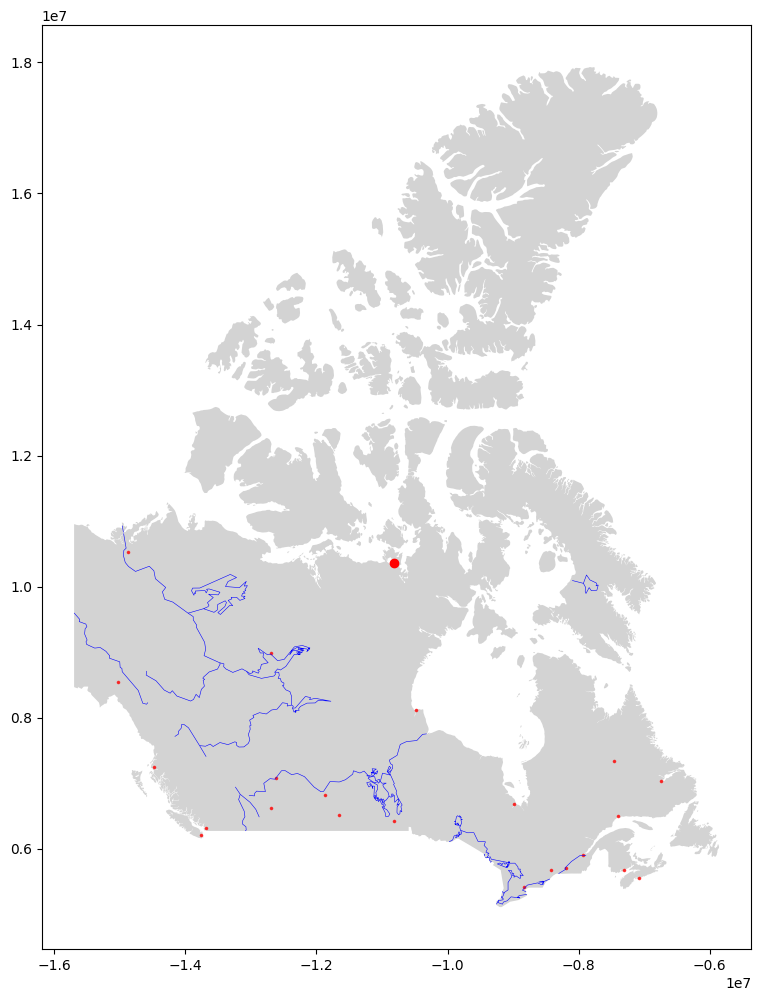

In [ ]:
canada=countries[countries['COUNTRY']=='Canada']
rivers_canada_clipped=gpd.clip(rivers,canada)

canada_3857=canada.to_crs(3857)
cities_canada_3857=cities[cities.COUNTRY=='Canada'].to_crs(3857)
rivers_canada_3857=rivers_canada_clipped.to_crs(canada_3857.crs)

ax_canada_3857 = canada_3857.plot(figsize=(12,12), color="lightgrey")
canada.to_crs(3857).centroid.plot(color='red',ax=ax_canada_3857,figsize=(12,12))
cities_canada_3857.plot(marker='.', color='red', markersize=10,alpha=0.7,
                    ax=ax_canada_3857)
rivers_canada_3857.plot(edgecolor='blue', linewidth=0.4,
                    ax=ax_canada_3857)

filepath=r'maps\Canada_Maps_3857.gpkg'
canada_3857.to_file(filepath, layer='country', driver="GPKG")
cities_canada_3857.to_file(filepath, layer='cities', driver="GPKG")
rivers_canada_3857.to_file(filepath, layer='rivers', driver="GPKG")

## Pregunta 3

   COUNTRY                                           geometry
35  Canada  MULTIPOLYGON (((-9404208.957 14001441.018, -94...


,geometry,name
35,"MULTILINESTRING ((-9404208.957 14001441.018, -...",Canada


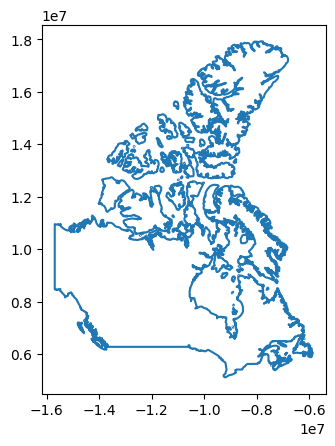

In [ ]:
print(canada_3857)
canada_3857.boundary.plot()
# conversion
canada_border=canada_3857.boundary.to_frame()
# new column (optional)
canada_border['name']='Canada'
# renaming the geometry column
canada_border.rename(columns={0:'geometry'},inplace=True)
#setting the geometry (the name is not enough)
canada_border = canada_border.set_geometry("geometry")
# verifying:
canada_border.crs
canada_border

In [1]:
print("hola mundo")

hola mundo
